<a href="https://colab.research.google.com/github/the-faisalahmed/Optimization/blob/main/Taquin_3x3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import itertools

# Original State

original_state = np.array([[2,1,4],
                            [6,5,3],
                            [8,7,0]])

current_state = original_state

# Winning state

winning_state = np.array([[1,2,3],
                          [4,5,6],
                          [7,8,0]])

# Possible moves
moves = {'U': (-1,0),
         'D': (1,0),
         'L': (0,-1),
         'R': (0,1)}



In [2]:
def valid_moves(y, x , action):
  y += moves[action][0]
  x += moves[action][1]
  if y < 0 or x < 0 or y > len(original_state) - 1 or x > len(original_state[0]) - 1:
      return False
  else:
      return True

def valid_states(current_array):
  allowed_states = []
  y,x = (np.where(current_array == 0)[0][0],np.where(current_array == 0)[1][0])
  for action in moves:
    if valid_moves(y,x, action):
      allowed_states.append(action)
  return allowed_states

def new_state(current,action):
  current = current.copy()
  y,x = (np.where(current == 0)[0][0],np.where(current == 0)[1][0])
  flip_y = y + moves[action][0]
  flip_x = x + moves[action][1]
  current[y,x]  = current[flip_y, flip_x]

  y += moves[action][0]
  x += moves[action][1]
  current[y, x] = 0

  return current

def reward(array):
  if np.array_equal(array,winning_state):
    return 10
  elif any([np.array_equal(array[i][j],winning_state[i][j]) for i in range(0,len(array)) for j in range(0,len(array[0]))]):
    return sum([np.array_equal(array[i][j],winning_state[i][j]) for i in range(0,len(array)) for j in range(0,len(array[0]))])
  else:
    return -4*random.random()

def done(array):
  if np.array_equal(array.tobytes(),winning_state.tobytes()):
    return True
  else:
    return False

In [3]:
# Creating states, and actions dict
states = {}
possible_moves = {}

dummy = []

for i in list(itertools.permutations([1,2,3,4,5,6,7,8,0])):
    dummy.append(np.reshape(i,(3,3)))

for i in dummy:
    states[i.tobytes()] = i

for i in states.keys():
  possible_moves[i] = valid_states(states[i])

In [4]:
# Creating Q table
q_table = {}
for i in states.keys():
  q_table[i] = [possible_moves[i],[]]

for i in states:
  for j in possible_moves[i]:
    a = states[i]
    current = new_state(a,j)
    q_table[i][1].append(reward(states[current.tobytes()]))

Episode: 0
Episode: 100
Episode: 200
Episode: 300
Episode: 400
Episode: 500
Episode: 600
Episode: 700
Episode: 800
Episode: 900
Episode: 1000
Episode: 1100
Episode: 1200
Episode: 1300
Episode: 1400
Episode: 1500
Episode: 1600
Episode: 1700
Episode: 1800
Episode: 1900
Training finished.



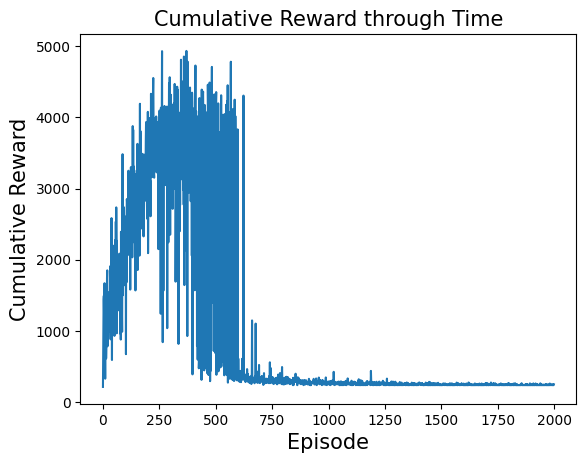

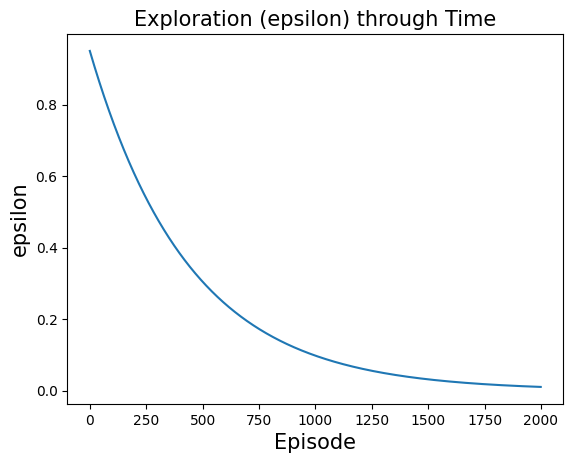

In [5]:
epsilon = 0.95
gamma = .99
alpha = 0.7

# For plotting metrics
cumulative_reward_each_episode = []
epsilon_each_episode = []

# For each episode
maxNumEpisodes = 2000
for i in range(maxNumEpisodes):

  # Reset to initial conditions
  state = original_state.tobytes()

  # The variable 'cumulative_reward' will store the sum of the accumulated
  # reward for an entire episode. Set this value to zero at the start of each
  # episode.

  cumulative_reward = 0

  over = False
  runs = 0

  # While the episode is not finished
  while not over:

    ##########################################
    # For every time step, using epsilon-greedy to choose between
    # exploration and exploitation.
    # Implement epsilon-greedy exploration.
    # Hint: to return a random action, do this:
    #           action = env.action_space.sample()
    ##########################################

    if np.random.random() >= epsilon:
      action = np.argmax(q_table[state][1])
    else:
      action = random.randint(0,len(q_table[state][0])-1)

    over = done(states[state])

    #Restricting it to this many runs
    over = any([over, runs == 1000])

		# Take the action.
		# This moves the agent to a new state and earns a reward

    next_state = new_state(states[state], q_table[state][0][action])
    next_state = next_state.tobytes()
    reward = q_table[state][1][action]


    # Add the reward just earned to the cumulative reward variable
    cumulative_reward += reward

    ##########################################
    # Update your estimate of Q(s,a)
    # Hint: to access a specific value in the q_table, do this:
    #            q_table[state, action]
    ##########################################

    q_table[state][1][action] = (1-alpha)*q_table[state][1][action] + \
                                  alpha*(reward + gamma*np.max(q_table[next_state][1]) - q_table[state][1][action])

    # Set your state variable to next_state for the next loop.
    state = next_state

    runs += 1


    # If this episode is finished, take care of a few things:
    if over:
      # Save the cumulative reward from the previous episode to an array.
      cumulative_reward_each_episode.append(cumulative_reward)

      # Save the epsilon used in this episode.
      epsilon_each_episode.append(epsilon)

      ##########################################
      # Decay epsilon,
      # If you want to decay or change the value of epsilon at the end of
      # each episode, do so here.
      ##########################################

      epsilon = epsilon*.997726

  if i % 100 == 0:
    print('Episode: {0}'.format(i))

print("Training finished.\n")

# Plot the Cumulative Reward and Epsilon value through time.
fsize = 15

plt.plot(cumulative_reward_each_episode)
plt.title('Cumulative Reward through Time', fontsize=fsize)
plt.xlabel('Episode', fontsize=fsize)
plt.ylabel('Cumulative Reward', fontsize=fsize)
plt.show()

plt.plot(epsilon_each_episode)
plt.title('Exploration (epsilon) through Time', fontsize=fsize)
plt.xlabel('Episode', fontsize=fsize)
plt.ylabel('epsilon', fontsize=fsize)
plt.show()

In [6]:
over = False

state = original_state.tobytes()

finished_run = [states[state]]
moves_made = []

while True:

  ##########################################
  # Choose an action based on exploitation.
  ##########################################

  action = np.argmax(q_table[state][1])
  moves_made.append(q_table[state][0][action])

  next_state = new_state(states[state], q_table[state][0][action])
  next_state = next_state.tobytes()

  state = next_state

  finished_run.append(states[state])

  over = np.array_equal(states[state],winning_state)

  if over:
    break;

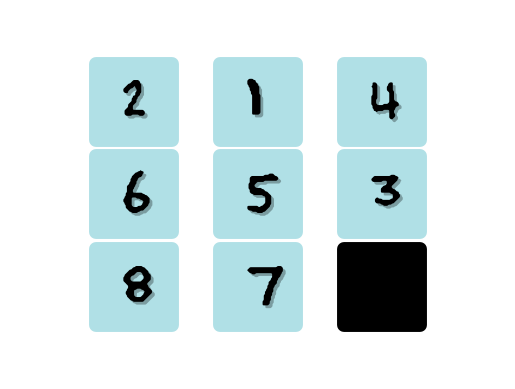

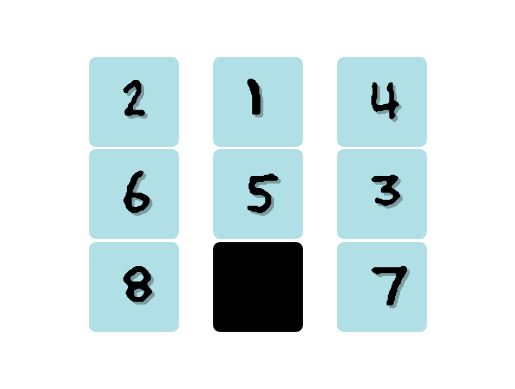

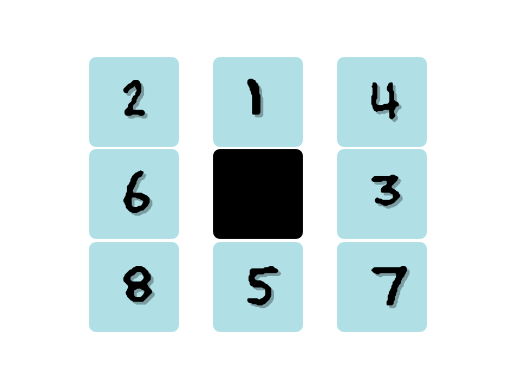

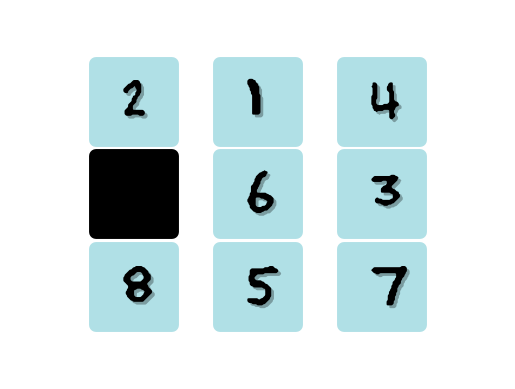

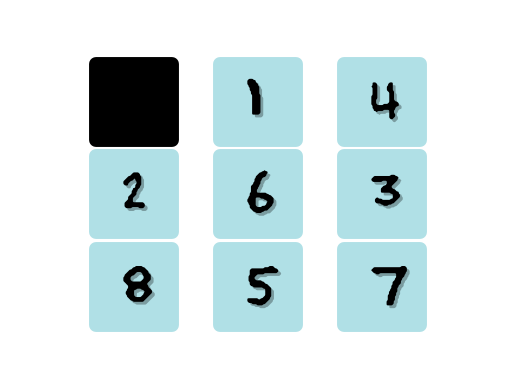

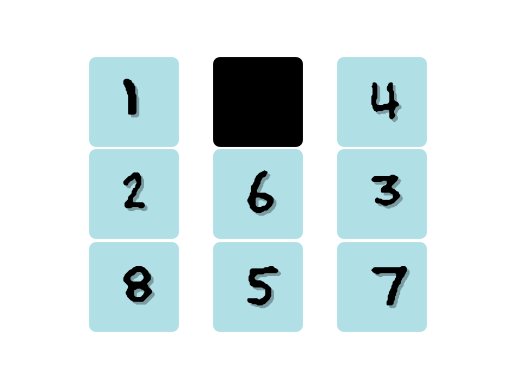

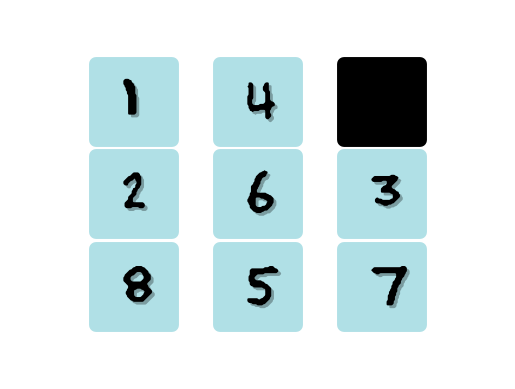

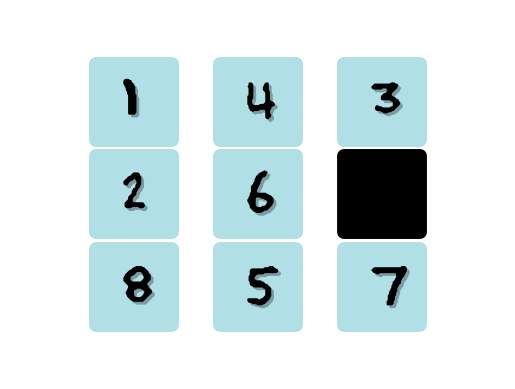

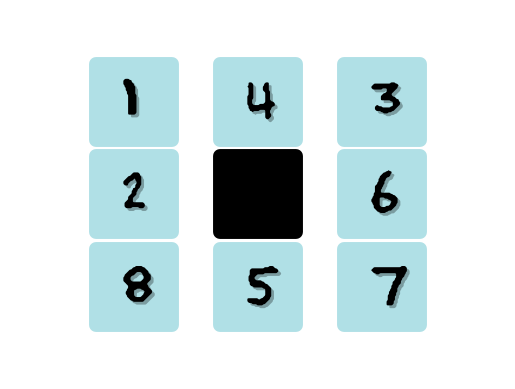

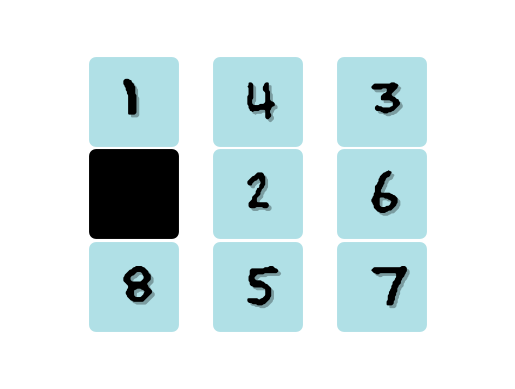

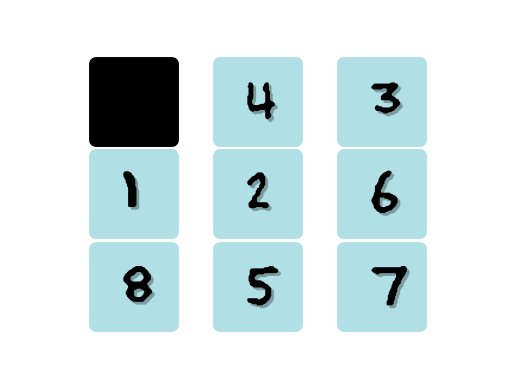

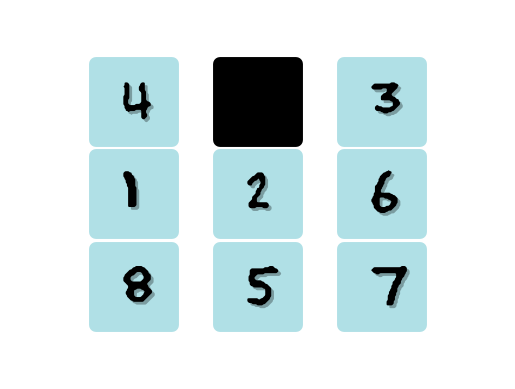

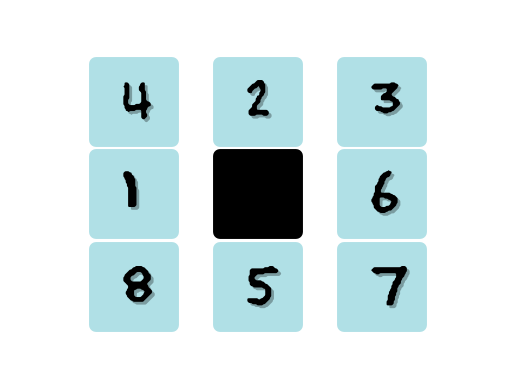

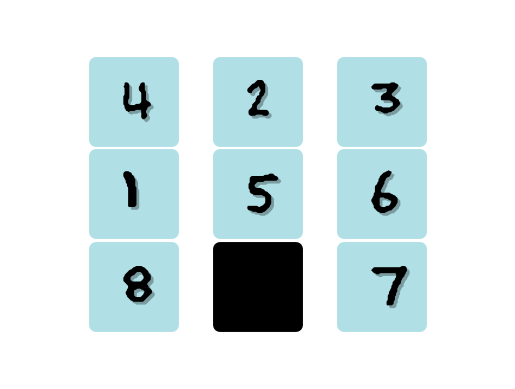

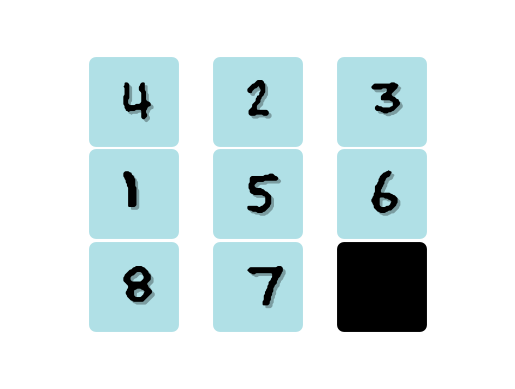

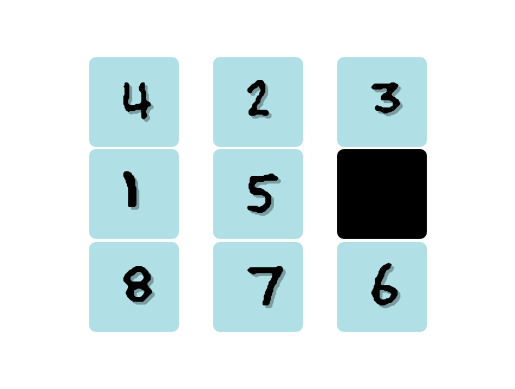

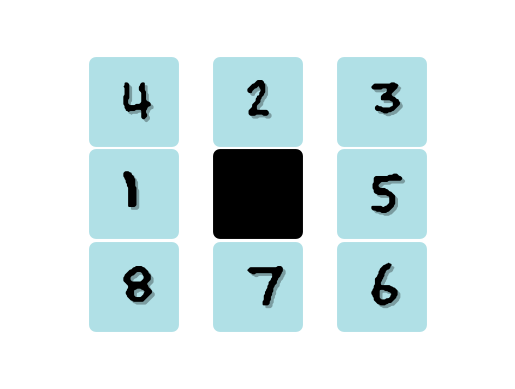

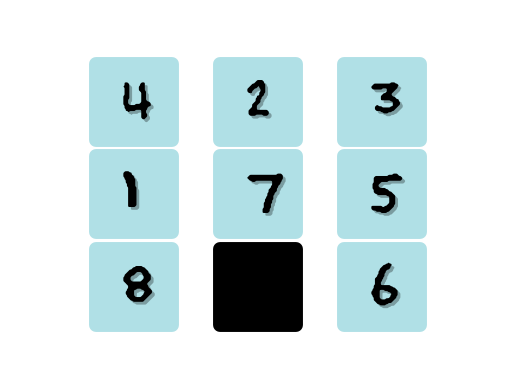

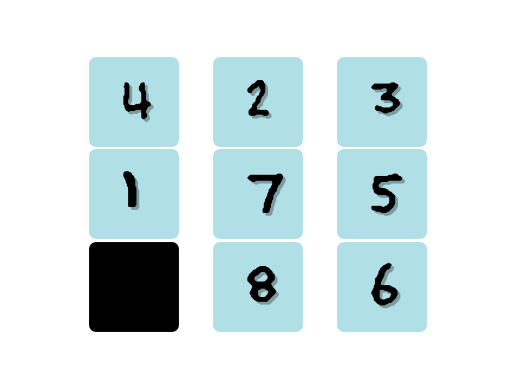

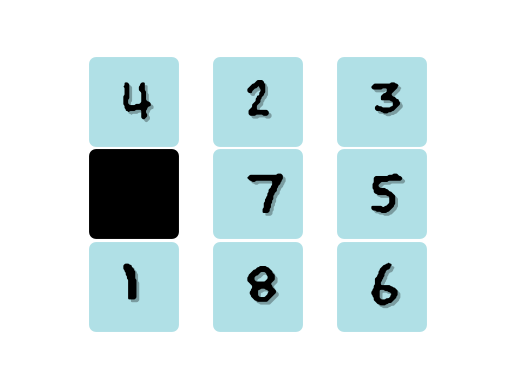

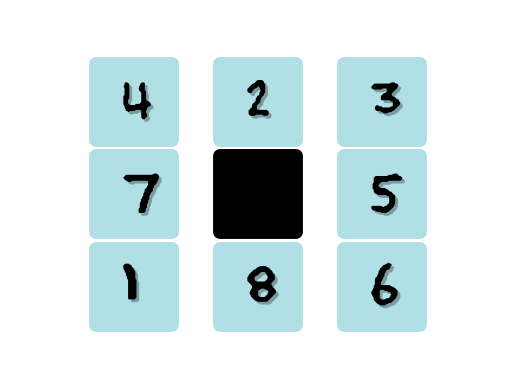

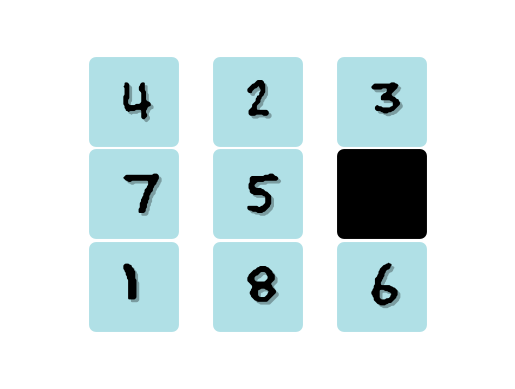

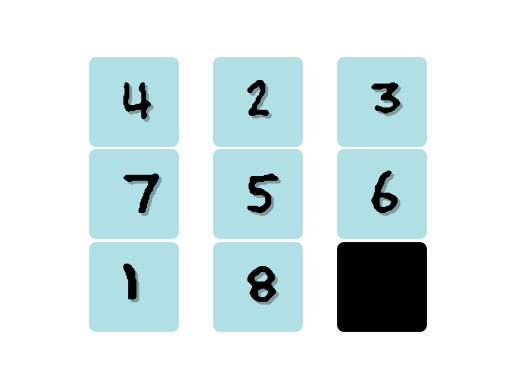

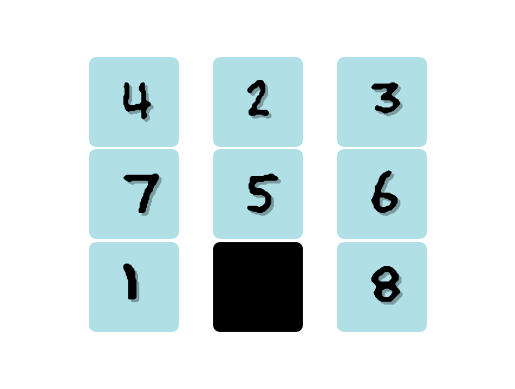

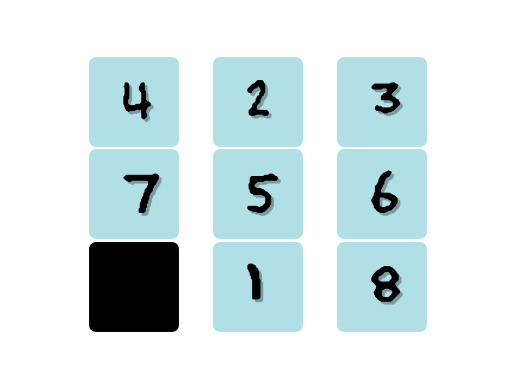

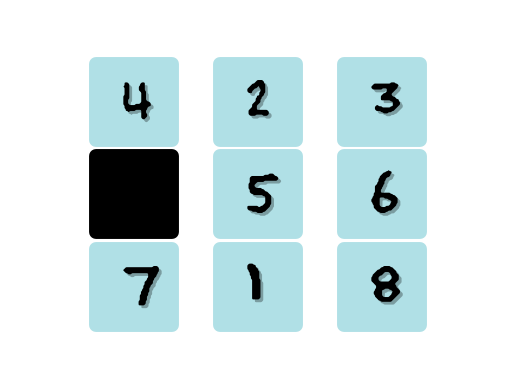

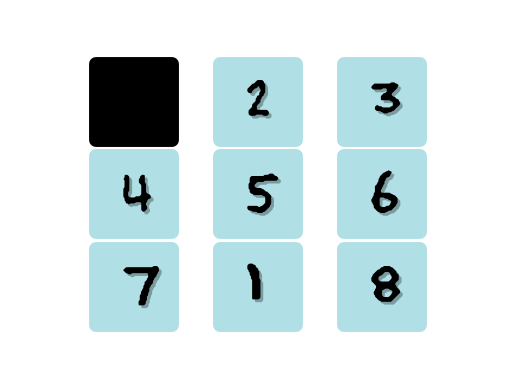

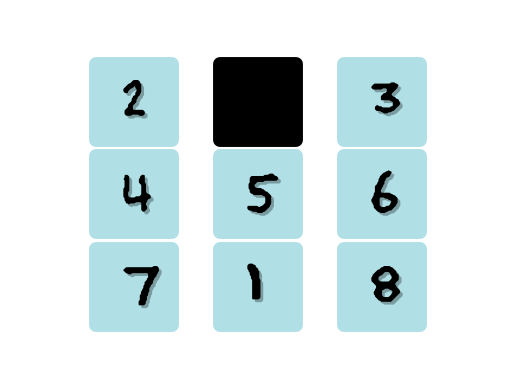

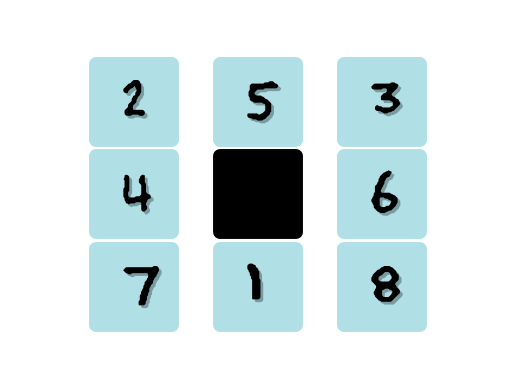

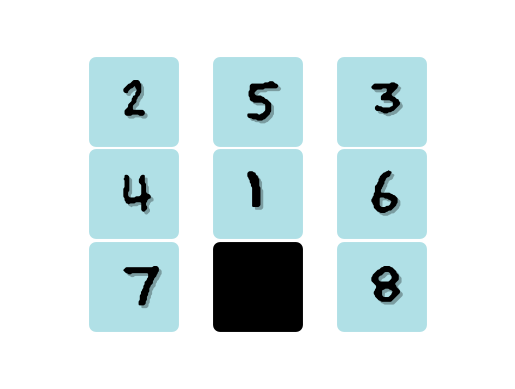

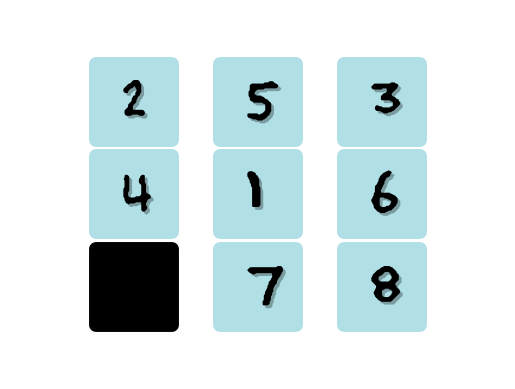

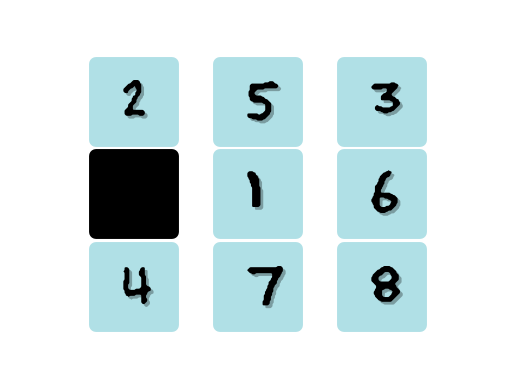

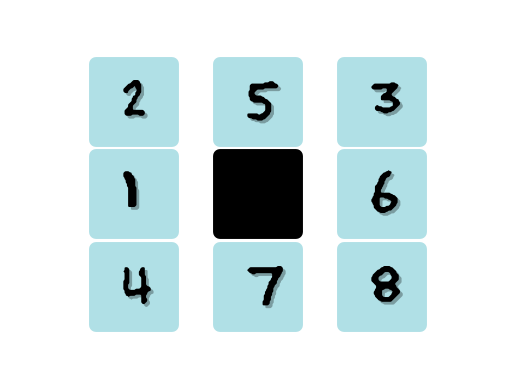

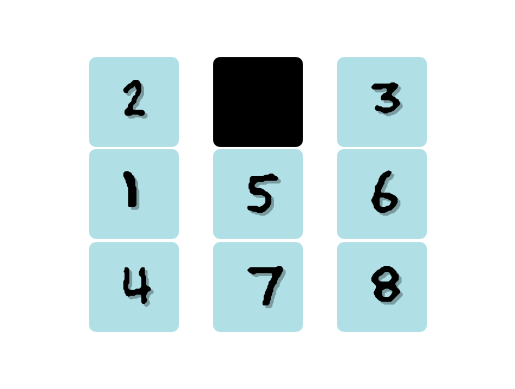

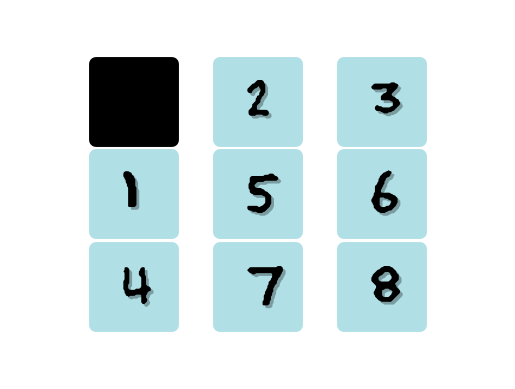

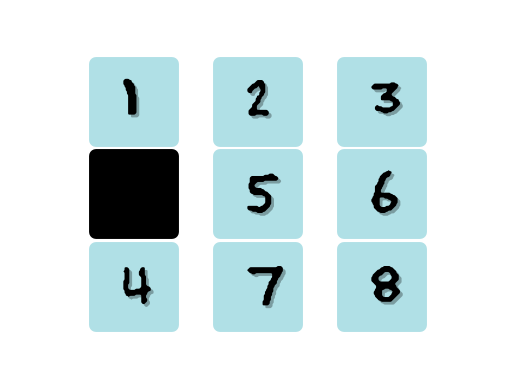

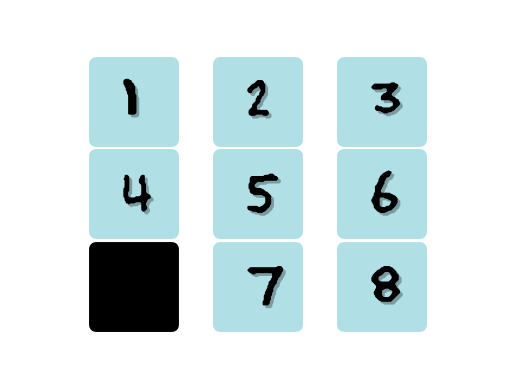

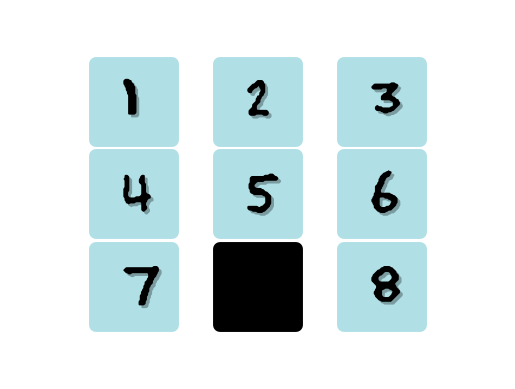

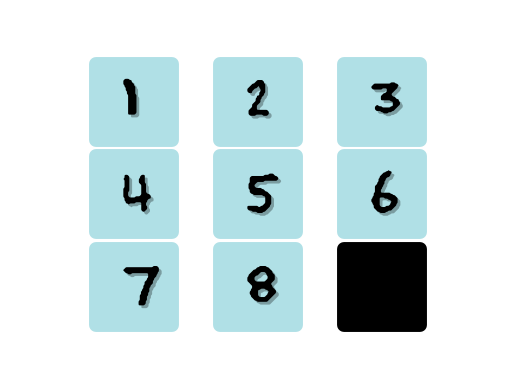

	zip warning: name not matched: 3x3.zip
updating: content/new_folder/ (stored 0%)
updating: content/new_folder/Taquin 3x3 34.jpg (deflated 42%)
updating: content/new_folder/Taquin 3x3 30.jpg (deflated 43%)
updating: content/new_folder/Taquin 3x3 21_.jpg (deflated 42%)
updating: content/new_folder/Taquin 3x3 1_.jpg (deflated 42%)
updating: content/new_folder/Taquin 3x3 16_.jpg (deflated 43%)
updating: content/new_folder/Taquin 3x3 14_.jpg (deflated 43%)
updating: content/new_folder/Taquin 3x3 17_.jpg (deflated 42%)
updating: content/new_folder/Taquin 3x3 34_.jpg (deflated 42%)
updating: content/new_folder/Taquin 3x3 38.jpg (deflated 43%)
updating: content/new_folder/Taquin 3x3 23_.jpg (deflated 42%)
updating: content/new_folder/Taquin 3x3 22.jpg (deflated 44%)
updating: content/new_folder/Taquin 3x3 21.jpg (deflated 43%)
updating: content/new_folder/Taquin 3x3 31.jpg (deflated 43%)
updating: content/new_folder/Taquin 3x3 23.jpg (deflated 43%)
updating: content/new_folder/Taquin 3x3 18.j

In [126]:
import matplotlib.patheffects as path_effects

#!mkdir new_folder

count = 0

for a in range(len(finished_run)):
  plt.clf()
  plt.axis('off')
  for i in range(0,3):
    for j in range(0,3):
      if np.flip(finished_run[a],0)[j][i] == 0:
        plt.scatter(i,j,
                    s = 3000,
                    marker='s',
                    c = '#000000',
                    linewidth = 10)
      else:
        plt.scatter(i,j, s = 3000,
                    marker='s',
                    c = '#B0E0E6',
                    linewidth = 10)
        plt.text(i-.1,j-.1,np.flip(finished_run[a],0)[j][i], fontsize = 40,
                 family="Fantasy",
                 path_effects=[path_effects.withSimplePatchShadow()]
                 )

  plt.xticks(range(-1,4));
  plt.yticks(range(-1,4));

  #plt.savefig('/content/new_folder/Taquin 3x3 %d_%s'%(count,'.jpg'))
  count+=1

  plt.show();


#!zip -r /content/Taquin 3x3.zip /content/new_folder